# Лабораторная работа: Наукометрический анализ публикаций ПензГТУ

В этой лабораторной мы анализируем выгрузку публикаций ПензГТУ (файл **PenzGTU_170925.xlsx**).

**Состав полей (основные):**
- `eid`, `doi`, `title` — идентификаторы и название публикации  
- `subtype`, `subtypeDescription` — тип публикации (журнал/конференция и т.п.)  
- `coverDate`, `ГОД` — дата и год публикации  
- `publicationName`, `issn`, `source_id` — издание  
- `citedby_count` — цитирования  
- `openaccess`, `freetoread`, `freetoreadLabel` — открытый доступ  
- `fund_acr`, `fund_no`, `fund_sponsor` — финансирование  
- `authkeywords` — ключевые слова (если заполнены)


## 1. Загрузка данных
Загрузите данные и выведите первые 10 строк. Опишите, какие признаки присутствуют в таблице.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Загрузка данных
df = pd.read_excel('PenzGTU_170925.xlsx')

# Вывод первых 10 строк и информации о данных
print("Первые 10 строк данных:")
print(df.head(10))
print("\nИнформация о данных:")
print(df.info())
print("\nОсновные статистики:")
print(df.describe())

Первые 10 строк данных:
                   eid                                          doi  pii  \
0  2-s2.0-105012463836                      10.17223/19988605/71/12  NaN   
1  2-s2.0-105007165732  10.1109/SmartIndustryCon65166.2025.10985979  NaN   
2  2-s2.0-105014163184               10.1109/EDM65517.2025.11096805  NaN   
3  2-s2.0-105009218530            10.1109/ICIEAM65163.2025.11028360  NaN   
4  2-s2.0-105007153390  10.1109/SmartIndustryCon65166.2025.10986049  NaN   
5  2-s2.0-105009226741            10.1109/ICIEAM65163.2025.11028560  NaN   
6  2-s2.0-105007160549  10.1109/SmartIndustryCon65166.2025.10986231  NaN   
7  2-s2.0-105007139482  10.1109/SmartIndustryCon65166.2025.10985973  NaN   
8  2-s2.0-105007145609  10.1109/SmartIndustryCon65166.2025.10986164  NaN   
9  2-s2.0-105009237341            10.1109/ICIEAM65163.2025.11028348  NaN   

   pubmed_id                                              title subtype  \
0        NaN  FPGA implementation and comparative analysis o... 

## Предобработка и приведение типов
Проведите предобработку данных (см. ниже комментарии в коде). Удалите пропуски, приведите данныек единым типам.


In [2]:
# Приведение года к целому числу
df['ГОД'] = pd.to_numeric(df['ГОД'], errors='coerce').astype('Int64')

# Цитирования в число
df['citedby_count'] = pd.to_numeric(df['citedby_count'], errors='coerce').fillna(0).astype(int)

# Открытый доступ — к бинарному виду
if 'openaccess' in df.columns:
    df['openaccess'] = df['openaccess'].map({1: 1, 0: 0}).fillna(0).astype(int)
else:
    df['openaccess'] = 0

# Нормализация названий изданий
if 'publicationName' in df.columns:
    df['publicationName'] = df['publicationName'].str.strip().str.title()

# Создание удобного столбца 'year'
df['year'] = df['ГОД']

# Удаление строк с пропусками в ключевых полях
df = df.dropna(subset=['ГОД'])

print(f"После предобработки: {len(df)} записей")

После предобработки: 738 записей


## 2. Публикации по годам
Постройте график распределения публикаций по годам. Как изменилась публикационная активность за последние 5 лет?

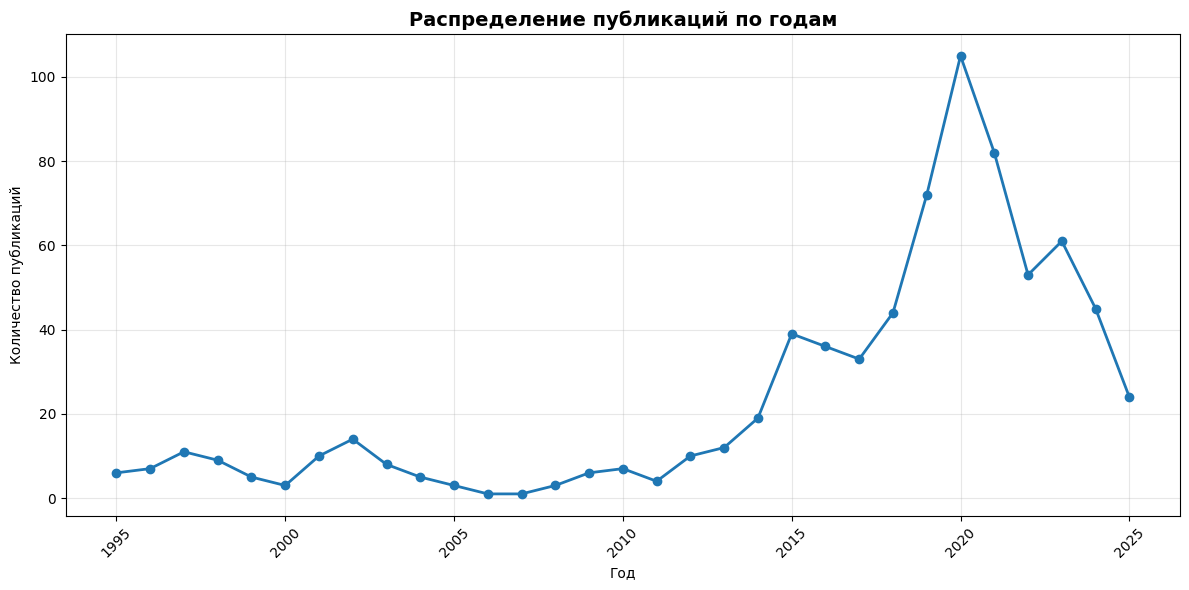

Публикации за последние 5 лет:
2020: 105 публикаций
2021: 82 публикаций
2022: 53 публикаций
2023: 61 публикаций
2024: 45 публикаций


In [3]:
plt.figure(figsize=(12, 6))
pub_by_year = df['year'].value_counts().sort_index()
plt.plot(pub_by_year.index, pub_by_year.values, marker='o', linewidth=2, markersize=6)
plt.title('Распределение публикаций по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество публикаций')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ последних 5 лет
current_year = pd.Timestamp.now().year
last_5_years = range(current_year-5, current_year)
pub_last_5 = df[df['year'].isin(last_5_years)]['year'].value_counts().sort_index()

print("Публикации за последние 5 лет:")
for year, count in pub_last_5.items():
    print(f"{year}: {count} публикаций")

## 3. Распределение по типам публикаций (`subtypeDescription`)
Визуализируйте распределение публикаций по типам (статья, доклад, обзор и прочее).

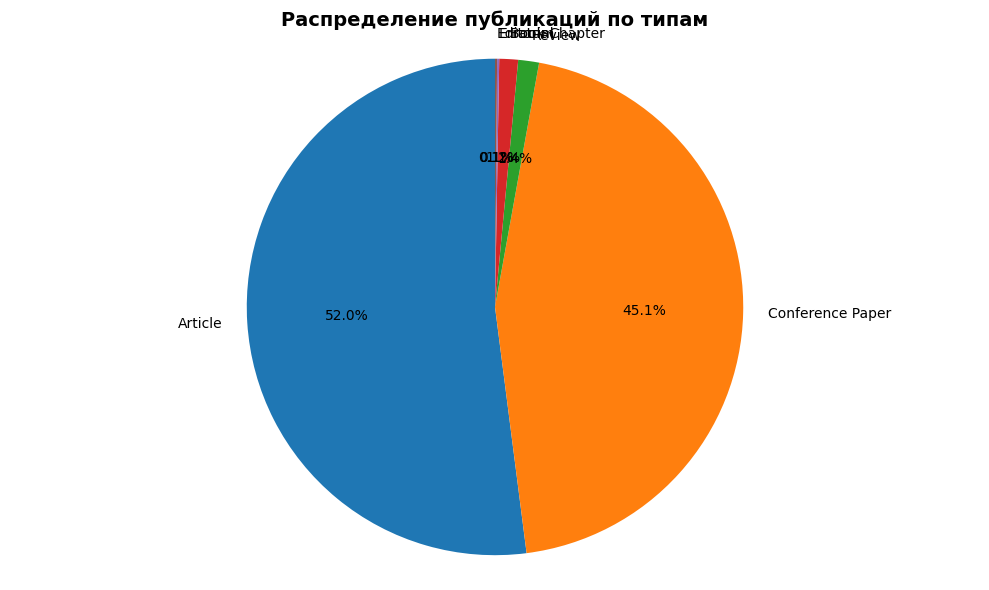

Распределение по типам публикаций:
subtypeDescription
Article             384
Conference Paper    333
Review               10
Book Chapter          9
Erratum               1
Editorial             1
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(10, 6))
subtype_counts = df['subtypeDescription'].value_counts()
plt.pie(subtype_counts.values, labels=subtype_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение публикаций по типам', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Распределение по типам публикаций:")
print(subtype_counts)

## 4. Топ изданий по числу публикаций и по сумме цитирований
Выведите топ-15 изданий по числу публикаций и по сумме цитирований

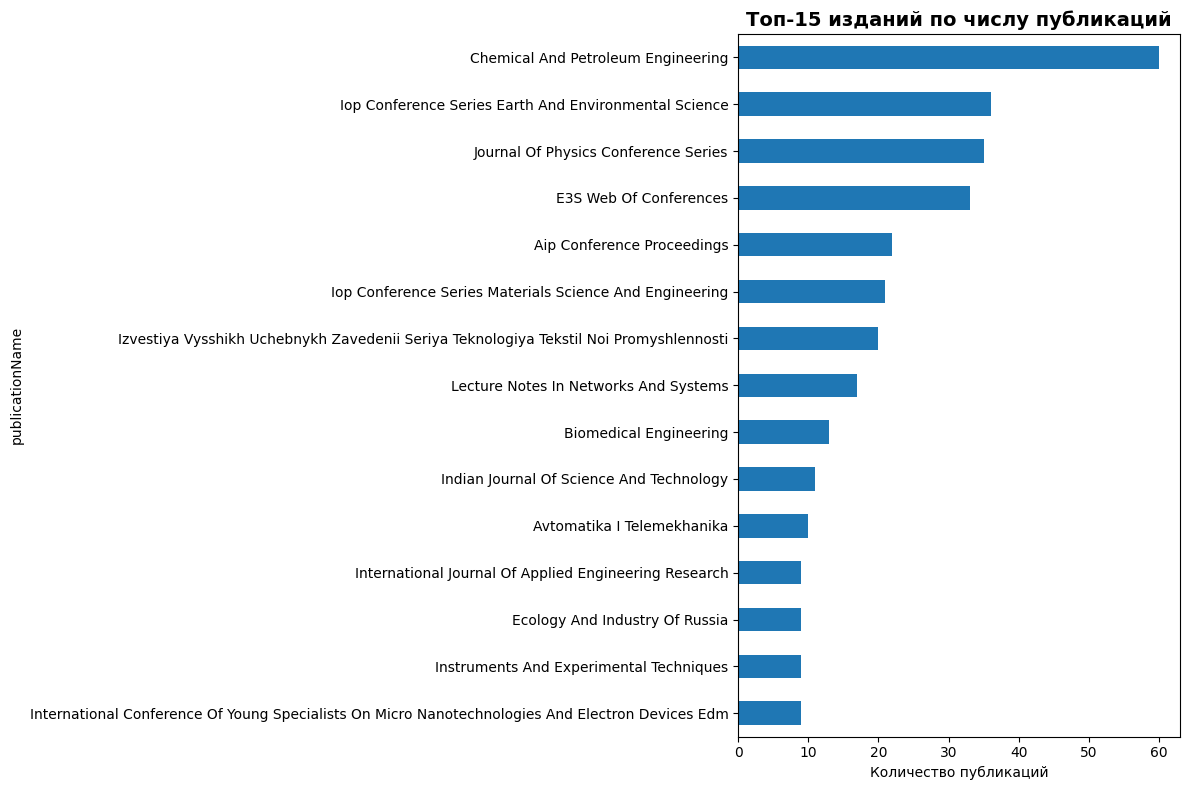

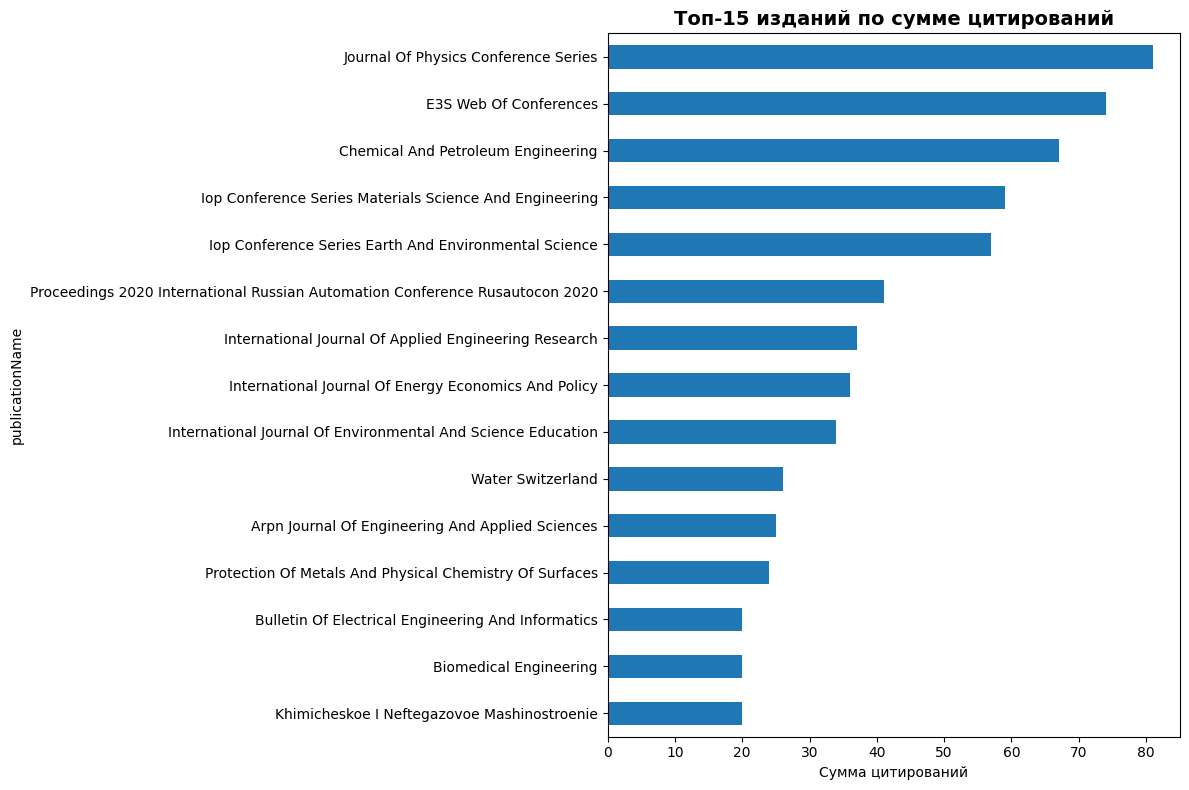

Топ-15 изданий по числу публикаций:
publicationName
Chemical And Petroleum Engineering                                                                  60
Iop Conference Series Earth And Environmental Science                                               36
Journal Of Physics Conference Series                                                                35
E3S Web Of Conferences                                                                              33
Aip Conference Proceedings                                                                          22
Iop Conference Series Materials Science And Engineering                                             21
Izvestiya Vysshikh Uchebnykh Zavedenii Seriya Teknologiya Tekstil Noi Promyshlennosti               20
Lecture Notes In Networks And Systems                                                               17
Biomedical Engineering                                                                              13
Indian Journal Of Sci

In [5]:
# Топ-15 по числу публикаций
top_pubs = df['publicationName'].value_counts().head(15)

plt.figure(figsize=(12, 8))
top_pubs.plot(kind='barh')
plt.title('Топ-15 изданий по числу публикаций', fontsize=14, fontweight='bold')
plt.xlabel('Количество публикаций')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Топ-15 по сумме цитирований
top_cited = df.groupby('publicationName')['citedby_count'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
top_cited.plot(kind='barh')
plt.title('Топ-15 изданий по сумме цитирований', fontsize=14, fontweight='bold')
plt.xlabel('Сумма цитирований')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Топ-15 изданий по числу публикаций:")
print(top_pubs)
print("\nТоп-15 изданий по сумме цитирований:")
print(top_cited)

## 5. Цитируемость: распределение и динамика
Постройте гистограмму распределения цитирований и график цитирований по годам

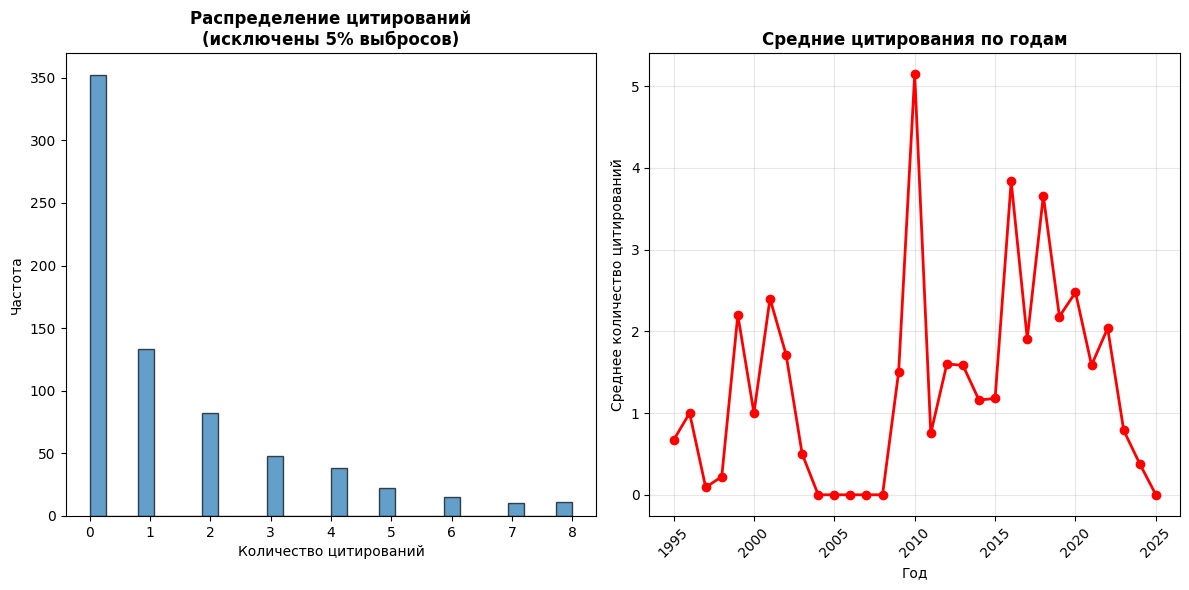

In [6]:
# Гистограмма распределения цитирований
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Исключаем выбросы для лучшей визуализации
cited_filtered = df[df['citedby_count'] <= df['citedby_count'].quantile(0.95)]['citedby_count']
plt.hist(cited_filtered, bins=30, alpha=0.7, edgecolor='black')
plt.title('Распределение цитирований\n(исключены 5% выбросов)', fontweight='bold')
plt.xlabel('Количество цитирований')
plt.ylabel('Частота')

# Динамика цитирований по годам
plt.subplot(1, 2, 2)
cites_by_year = df.groupby('year')['citedby_count'].mean()
plt.plot(cites_by_year.index, cites_by_year.values, marker='o', color='red', linewidth=2)
plt.title('Средние цитирования по годам', fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Среднее количество цитирований')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 6. Открытый доступ (OA) и его динамика
Рассчитайте долю публикаций с открытым доступом для каждого года.

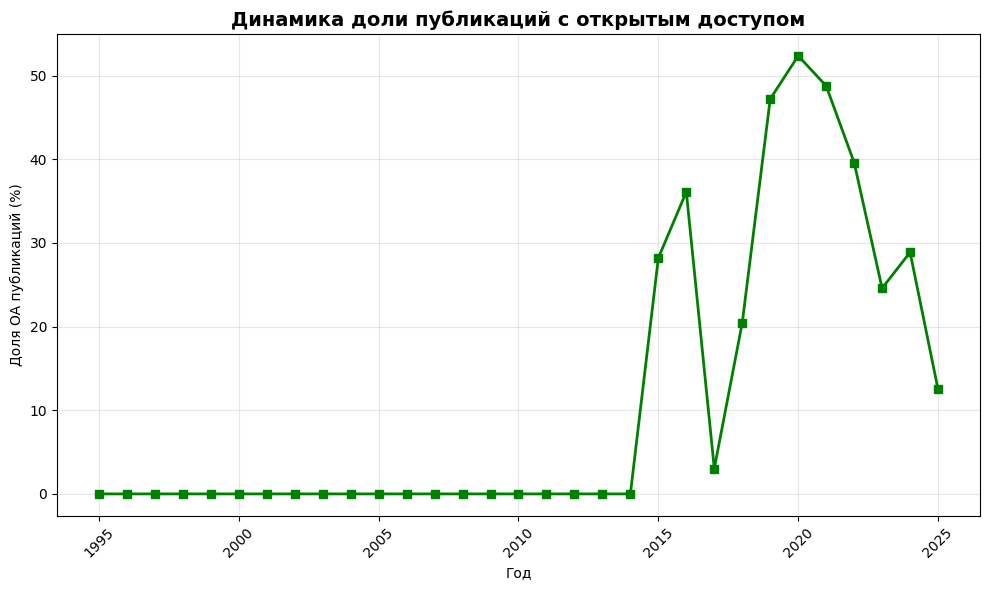

Доля публикаций с открытым доступом по годам:
1995: 0.0%
1996: 0.0%
1997: 0.0%
1998: 0.0%
1999: 0.0%
2000: 0.0%
2001: 0.0%
2002: 0.0%
2003: 0.0%
2004: 0.0%
2005: 0.0%
2006: 0.0%
2007: 0.0%
2008: 0.0%
2009: 0.0%
2010: 0.0%
2011: 0.0%
2012: 0.0%
2013: 0.0%
2014: 0.0%
2015: 28.2%
2016: 36.1%
2017: 3.0%
2018: 20.5%
2019: 47.2%
2020: 52.4%
2021: 48.8%
2022: 39.6%
2023: 24.6%
2024: 28.9%
2025: 12.5%


In [7]:
oa_by_year = df.groupby('year')['openaccess'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(oa_by_year.index, oa_by_year.values, marker='s', color='green', linewidth=2)
plt.title('Динамика доли публикаций с открытым доступом', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Доля OA публикаций (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Доля публикаций с открытым доступом по годам:")
for year, percent in oa_by_year.items():
    print(f"{year}: {percent:.1f}%")

## 7. Средние цитирования по изданиям
Определите Топ-20 изданий по цитированию (какие были процитирован чаще всего)

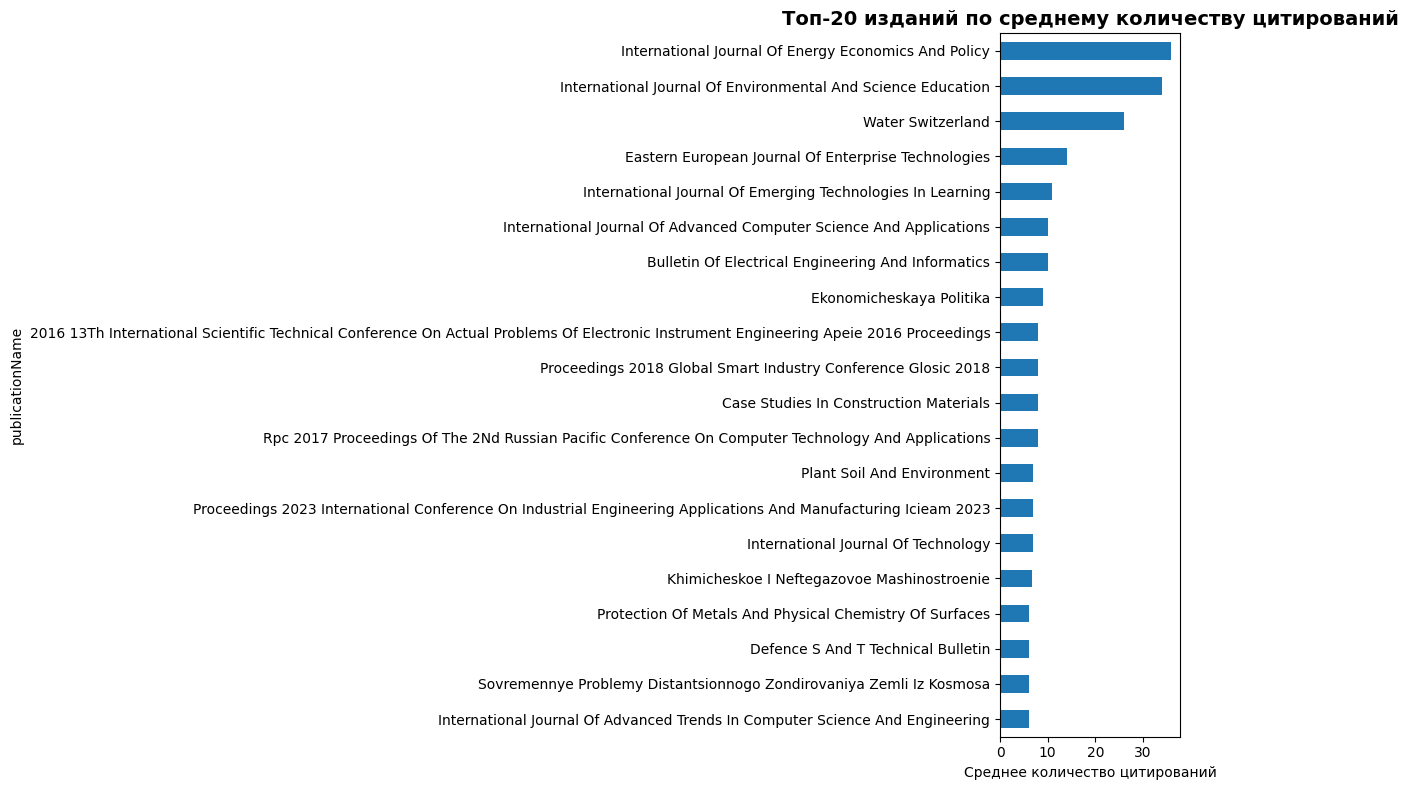

Топ-20 изданий по среднему количеству цитирований:
publicationName
International Journal Of Energy Economics And Policy                                                                                      36.000000
International Journal Of Environmental And Science Education                                                                              34.000000
Water Switzerland                                                                                                                         26.000000
Eastern European Journal Of Enterprise Technologies                                                                                       14.000000
International Journal Of Emerging Technologies In Learning                                                                                11.000000
International Journal Of Advanced Computer Science And Applications                                                                       10.000000
Bulletin Of Electrical Engineering And Inform

In [8]:
top_20_mean_cited = df.groupby('publicationName')['citedby_count'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_20_mean_cited.plot(kind='barh')
plt.title('Топ-20 изданий по среднему количеству цитирований', fontsize=14, fontweight='bold')
plt.xlabel('Среднее количество цитирований')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Топ-20 изданий по среднему количеству цитирований:")
print(top_20_mean_cited)

## 8. Очень высоко цитируемые публикации
Определите Топ-10 наиболее высоко цитируемых статей (какие были процитированы чаще всего)

In [9]:
top_10_cited = df.nlargest(10, 'citedby_count')[['title', 'year', 'publicationName', 'citedby_count']]

print("Топ-10 наиболее цитируемых публикаций:")
for i, (idx, row) in enumerate(top_10_cited.iterrows(), 1):
    print(f"{i}. {row['title'][:80]}... | {row['year']} | {row['publicationName']} | Цитирований: {row['citedby_count']}")

Топ-10 наиболее цитируемых публикаций:
1. Population of the world and regions as the principal energy consumer... | 2018 | International Journal Of Energy Economics And Policy | Цитирований: 36
2. Crop insurance as a means of increasing efficiency of agricultural production in... | 2016 | International Journal Of Environmental And Science Education | Цитирований: 34
3. Graphene Oxide-Chitosan Composites for Water Treatment from Copper Cations... | 2022 | Water Switzerland | Цитирований: 26
4. Models and methods of forecasting pitting corrosion... | 2010 | Protection Of Metals And Physical Chemistry Of Surfaces | Цитирований: 19
5. Building Neural Network for Pattern Recognition... | 2020 | Proceedings 2020 International Russian Automation Conference Rusautocon 2020 | Цитирований: 18
6. Multifunctional Fiberoptic Sensors For Space Infrastructure... | 2021 | Eastern European Journal Of Enterprise Technologies | Цитирований: 14
7. Russian literary-critical reception of burns at turning of

## 9. Открытый доступ и цитируемость (сравнение средних)
Проанализируйте, как влияет открытый доступ на цитируемость публикаций

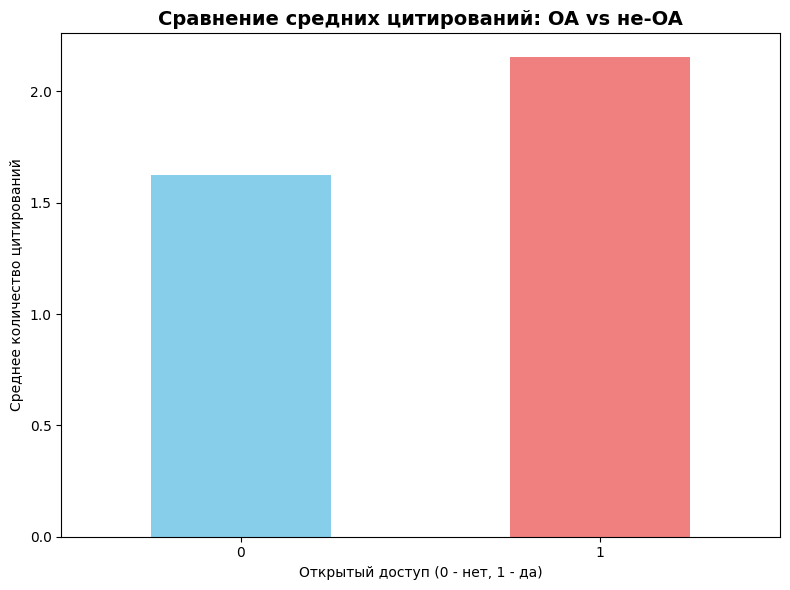

Сравнение цитирований:
Публикации без OA: 1.63 цитирований в среднем
Публикации с OA: 2.15 цитирований в среднем

T-тест: t-статистика = -2.045, p-значение = 0.041
Различия статистически значимы (p < 0.05)


In [10]:
oa_citation = df.groupby('openaccess')['citedby_count'].mean()

plt.figure(figsize=(8, 6))
oa_citation.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Сравнение средних цитирований: OA vs не-OA', fontsize=14, fontweight='bold')
plt.xlabel('Открытый доступ (0 - нет, 1 - да)')
plt.ylabel('Среднее количество цитирований')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Сравнение цитирований:")
print(f"Публикации без OA: {oa_citation[0]:.2f} цитирований в среднем")
print(f"Публикации с OA: {oa_citation[1]:.2f} цитирований в среднем")

# T-тест для проверки значимости различий
from scipy import stats
oa_0 = df[df['openaccess'] == 0]['citedby_count']
oa_1 = df[df['openaccess'] == 1]['citedby_count']
t_stat, p_value = stats.ttest_ind(oa_0, oa_1, equal_var=False)

print(f"\nT-тест: t-статистика = {t_stat:.3f}, p-значение = {p_value:.3f}")
if p_value < 0.05:
    print("Различия статистически значимы (p < 0.05)")
else:
    print("Различия не являются статистически значимыми")


## 10. Прогноз числа публикаций на следующий год (линейная регрессия)
Постройте прогноз числа публикаций на следующий год. Самое простое - используйте линейную регрессию. Можно использовать и другие

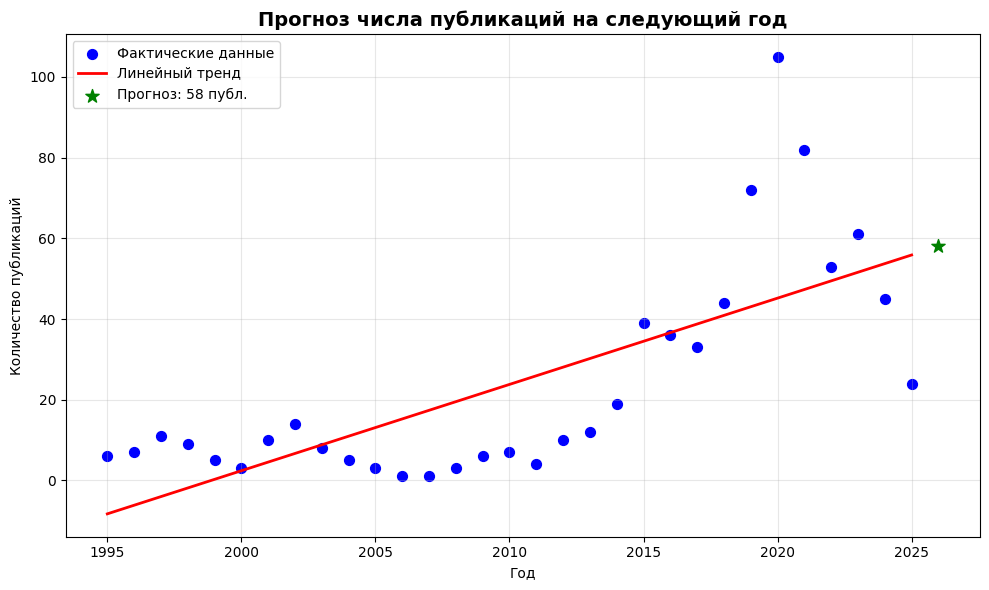

Прогноз числа публикаций на 2026 год: 58 публикаций
Коэффициент детерминации (R²): 0.521


In [11]:
# Подготовка данных для прогноза
pub_count_by_year = df['year'].value_counts().sort_index()
years = pub_count_by_year.index.values.reshape(-1, 1)
counts = pub_count_by_year.values

# Линейная регрессия
model = LinearRegression()
model.fit(years, counts)

# Прогноз на следующий год
next_year = np.array([[years.max() + 1]])
prediction = model.predict(next_year)[0]

plt.figure(figsize=(10, 6))
plt.scatter(years, counts, color='blue', s=50, label='Фактические данные')
plt.plot(years, model.predict(years), color='red', linewidth=2, label='Линейный тренд')
plt.scatter(next_year, prediction, color='green', s=100, marker='*', label=f'Прогноз: {prediction:.0f} публ.')
plt.title('Прогноз числа публикаций на следующий год', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество публикаций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Прогноз числа публикаций на {next_year[0][0]} год: {prediction:.0f} публикаций")
print(f"Коэффициент детерминации (R²): {model.score(years, counts):.3f}")